In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

import jsm_routines
import galhalo
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


### SOME MISC apps

In [ ]:
Nreal = 1
Nhalo = 1700

acc_mass = np.zeros(shape=(Nreal, Nhalo))

acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
mass_clean, red_clean = accretion_mass(file)

print(len(mass_clean))

mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)

red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)

acc_mass[0,:] = mass

acc_redshift[0,:] = red

In [ ]:
mass_clean, red_clean = accretion_mass(file, plot_evo=True)

### unevolved

In [ ]:
datadir = "../../prelim/output_tree/"

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

acc_mass = np.zeros(shape=(Nreal, Nhalo))

acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean, red_clean = accretion_mass(file)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
    
    red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)
    
    acc_mass[i,:] = mass
    
    acc_redshift[i,:] = red

In [ ]:
SHMF(acc_mass, acc_redshift)

### surviving

In [ ]:
datadir = "../../prelim/output_evolve/"

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

surv_mass = np.zeros(shape=(Nreal, Nhalo))

surv_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean = surviving_mass(file, 10**9)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
        
    surv_mass[i,:] = mass

In [ ]:
SHMF(surv_mass, 0)

### accreation mass of surviving

In [ ]:
Nreal = len([entry for entry in os.listdir(datadir)])
Nhalo = 200

surv_acc_mass = np.zeros(shape=(Nreal, Nhalo))

surv_acc_redshift = np.zeros(shape=(Nreal, Nhalo))

In [ ]:
for i,filename in enumerate(os.listdir(datadir)):
        
    file = os.path.join(datadir, filename)
        
    mass_clean, red_clean = accretion_mass_surv(file, 10**9)
    
    mass = np.pad(mass_clean, (0,Nhalo-len(mass_clean)), mode="constant", constant_values=0)
    
    red = np.pad(red_clean, (0,Nhalo-len(red_clean)), mode="constant", constant_values=np.nan)
    
    surv_acc_mass[i,:] = mass
    
    surv_acc_redshift[i,:] = red

### trying to recreate the SatGen plot

In [ ]:
data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

In [ ]:
mass_frac = data
mass_frac[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = mass_frac != 0.0 
ana_mass = np.log10(np.where(zero_mask, mass_frac, np.nan))  # up until here the stats are good

In [ ]:
for i in range(200):
    test = ana_mass[i]

    counts, bins = np.histogram(test, bins=15, range=(-4, -0.1))

    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    plt.plot(bincenters, np.log10(counts))
plt.xlabel("halo mass m/M")
plt.show()

In [ ]:
# for a single host! (or realization)

for i in range(200):
    test = data[i]
    test[0] = 0.0
    new = np.log10(test[test != 0.0])
    
    counts, bins = np.histogram(new, bins=15, range=(8,12))

    binsize = (bins[1] - bins[0])
    bincenters = 0.5 * (bins[1:] + bins[:-1])

    plt.plot(bincenters, np.log10(counts))
plt.xlabel("halo mass")
plt.show()

### working out CMF

In [2]:
data = np.load("../../data/12_4_0/numpy/surv_mass.npy")

In [3]:

data[:, 0] = 0.0  # removing the host mass from the matrix
zero_mask = data != 0.0 #masking the padding!
Mh = np.log10(np.where(zero_mask, data, np.nan)) #switching the to nans!


In [4]:

Mh_sort = np.sort(Mh, axis=1)


In [12]:
Mh_sort.shape == Mh.shape

True

In [13]:
I = np.zeros((Mh_sort.shape))

In [14]:

for i,realization in enumerate(Mh_sort): #this double for loop can probably be replaced!
    for j,mass in enumerate(realization):
        if np.isnan(mass) == False:
            I[i,j] = np.sum(realization > mass)
        else:
            I[i,j] = np.nan


In [15]:
for i in range(300):
    print(np.sum(~np.isnan(I[i])))
    print(np.sum(~np.isnan(Mh_sort[i])))
    print("&&&&&&&&&&&&&")

243
243
&&&&&&&&&&&&&
287
287
&&&&&&&&&&&&&
239
239
&&&&&&&&&&&&&
261
261
&&&&&&&&&&&&&
225
225
&&&&&&&&&&&&&
264
264
&&&&&&&&&&&&&
231
231
&&&&&&&&&&&&&
242
242
&&&&&&&&&&&&&
199
199
&&&&&&&&&&&&&
235
235
&&&&&&&&&&&&&
217
217
&&&&&&&&&&&&&
230
230
&&&&&&&&&&&&&
243
243
&&&&&&&&&&&&&
254
254
&&&&&&&&&&&&&
236
236
&&&&&&&&&&&&&
217
217
&&&&&&&&&&&&&
222
222
&&&&&&&&&&&&&
221
221
&&&&&&&&&&&&&
270
270
&&&&&&&&&&&&&
286
286
&&&&&&&&&&&&&
247
247
&&&&&&&&&&&&&
228
228
&&&&&&&&&&&&&
260
260
&&&&&&&&&&&&&
263
263
&&&&&&&&&&&&&
239
239
&&&&&&&&&&&&&
214
214
&&&&&&&&&&&&&
245
245
&&&&&&&&&&&&&
246
246
&&&&&&&&&&&&&
225
225
&&&&&&&&&&&&&
246
246
&&&&&&&&&&&&&
237
237
&&&&&&&&&&&&&
237
237
&&&&&&&&&&&&&
205
205
&&&&&&&&&&&&&
183
183
&&&&&&&&&&&&&
240
240
&&&&&&&&&&&&&
254
254
&&&&&&&&&&&&&
254
254
&&&&&&&&&&&&&
253
253
&&&&&&&&&&&&&
278
278
&&&&&&&&&&&&&
244
244
&&&&&&&&&&&&&
250
250
&&&&&&&&&&&&&
203
203
&&&&&&&&&&&&&
248
248
&&&&&&&&&&&&&
274
274
&&&&&&&&&&&&&
217
217
&&&&&&&&&&&&&
232
232
&&

In [47]:
CSMF = np.nanmedian(I, axis=0) # the percentiles

median_mass = np.nanmedian(Mh_sort, axis=0) # the percentiles


/Users/jsmonzon/opt/miniconda3/envs/subhalos/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [49]:
np.sum(~np.isnan(median_mass))  == np.sum(~np.isnan(CSMF))

True

In [50]:
x = median_mass[~np.isnan(median_mass)]
y = CSMF[~np.isnan(median_mass)]

sort = np.argsort(x)
xs = x[sort]
ys = y[sort]

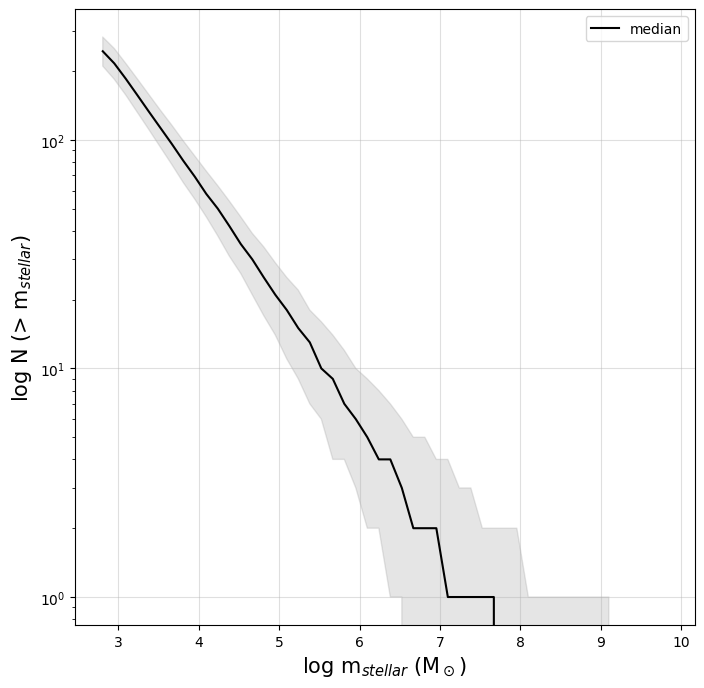

In [57]:
mass, quant = jsm_routines.CSMF(data)

/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(galhalo.lgMs_D22_det(10**xs), np.log10(ys), label="sorting + \nthe median mass range")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(mass, np.log10(quant[1]), label="no sorting + \nusing an evenly spaced mass range")
/var/folders/91/ygwd64w5659_623tzhx80kbc0000gn/T/ipykernel_3270/326801359.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(mass, y1=np.log10(quant[0]), y2=np.log10(quant[2]), alpha=0.2, color="grey")


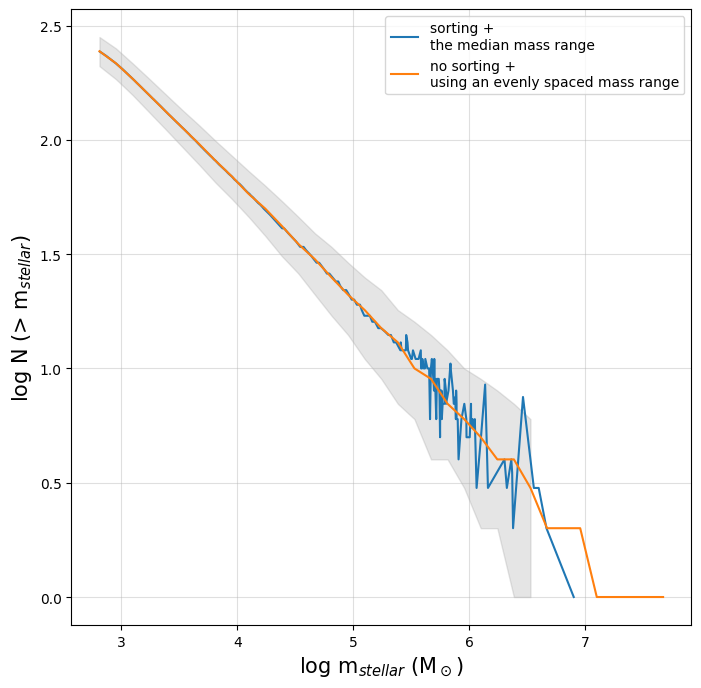

In [65]:
plt.figure(figsize=(8, 8))

plt.plot(galhalo.lgMs_D22_det(10**xs), np.log10(ys), label="sorting + \nthe median mass range")
plt.plot(mass, np.log10(quant[1]), label="no sorting + \nusing an evenly spaced mass range")
plt.fill_between(mass, y1=np.log10(quant[0]), y2=np.log10(quant[2]), alpha=0.2, color="grey")
plt.grid(alpha=0.4)
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()

In [ ]:
np.sum(~np.isnan(Mh[55]))

In [ ]:

Ms = galhalo.lgMs_D22_det(Mh)
mass_range = np.linspace(np.nanmin(Ms), np.nanmax(Ms), Npix)

#now converting to stellar mass, choice of scatter !
if scatter != False:
    Ms = galhalo.lgMs_D22_dex(Mh, scatter)

#now to start counting!
I = np.zeros((Ms.shape[0], Npix))

for i,realization in enumerate(Ms): #this double for loop can probably be replaced!
    for j,mass in enumerate(mass_range):
        I[i,j] = np.sum(realization > mass)
        

In [ ]:
np.nanmax(data_c)

In [ ]:
np.nanmin(data_c)

N =100

In [ ]:
mass_range = np.linspace(np.nanmin(data_c), np.nanmax(data_c), N)

In [ ]:
data_c[0,:]

In [ ]:
mat = np.zeros((data_c.shape[0], N))

for i,realization in enumerate(data_c):
    
    for j,mass in enumerate(mass_range):

        mat[i,j] = np.sum(realization > mass)

In [ ]:
SMF_quant = np.percentile(mat, [15, 50, 85], axis=0)

ave = np.average(mat, axis=0)

In [ ]:
SMF_quant[0]

In [ ]:
sat_range = galhalo.lgMs_D22_det(10**mass_range)

In [ ]:
galhalo.lgMs_D22_det(1e11)

In [ ]:
plt.plot(sat_range, np.log10(SMF_quant[1]))
plt.fill_between(sat_range, np.log10(SMF_quant[0]), np.log10(SMF_quant[2]), alpha=0.1)
#plt.plot(sat_range, np.log10(ave))
plt.grid(alpha=0.4)
plt.show()

In [ ]:
plt.plot(mass_range, np.log10(SMF_quant[1]))
plt.fill_between(mass_range, np.log10(SMF_quant[0]), np.log10(SMF_quant[2]), alpha=0.1)
plt.plot(mass_range, np.log10(ave))
plt.grid(alpha=0.4)
plt.show()

### Now trying to include a single value of sigma_SHMR

In [ ]:
test = galhalo.lgMs_D22_dex(10**data_c, dex=0.25)

In [ ]:
matt = np.zeros((data_c.shape[0], N))

for i,realization in enumerate(test):
    
    for j,mass in enumerate(sat_range):

        matt[i,j] = np.sum(realization > mass)

In [ ]:
SMF_quantt = np.percentile(matt, [15, 50, 85], axis=0)

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(sat_range, SMF_quantt[1])
plt.fill_between(sat_range, SMF_quantt[0],SMF_quantt[2], alpha=0.1)
plt.plot(sat_range,SMF_quant[1])
plt.fill_between(sat_range, SMF_quant[0], SMF_quant[2], alpha=0.1)
plt.yscale("log")
plt.grid(alpha=0.4)
plt.show()